## Problem

Let's assume we have n points, i-th has coordinates $(x_{i}, y_{i})$. We have inaccurate measurements for distances from each of points to fixed one. Our goal is to approximate it's coordinates $(x_{*}, y_{*})$. 

$d_{i,*}^2 = (x_{*} - x_{i})^2 + (y_{*} - y_{i})^2, i=1..n $

This system is non-linear wrt $x_{*}, y_{*}$.

Let's define 
$r_{i} = y_{i} - f(x_{i}, x_{*}, y_{*})$

Using Newton's method for non-linear minimum squares approximation: 

$J_{r}^{T} J_{r} c^{k+1} = J_{r}^{T} J_{r} c^{k} - J_{r}^{T} r(c^{k})$, where $c_{k} = {x_{*} ^ k, y_{*}^k}$

Where terminating condition will be: 
$\mid\mid c^{k+1} - c^k\mid\mid < \epsilon$


In [15]:
import numpy as np

## Loading matrix of points and distances in format (x, y, d)

In [16]:
fname = 'Distances.txt'
table = np.loadtxt(fname, dtype=float)
x = table[:, 0]
y = table[:, 1]
d = table[:, 2]
n = x.shape[0]

In [17]:
def r(c):
    xk, yk = c
    return d**2 - (xk - x)**2 - (yk - y)**2

In [18]:
def j(c):
    xk, yk = c
    jacobian = np.zeros((n, 2))
    jacobian[:, 0] = -2 * (xk - x)
    jacobian[:, 1] = -2 * (yk - y)
    return jacobian

In [19]:
eps = 0.001
curr_c = np.zeros((2,))
prev_c = np.ones((2,))
while (all(abs(curr_c - prev_c) > eps)):
    prev_c = curr_c
    jacobian = j(curr_c)
    curr_c = prev_c - np.linalg.inv(np.transpose(jacobian) @ jacobian) @ np.transpose(jacobian) @ r(curr_c)
res_x, res_y = curr_c

## Plotting results

In [20]:
import matplotlib.pyplot as plt

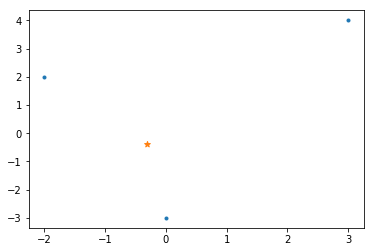

In [21]:
plt.scatter(x, y, marker = '.')
plt.scatter(res_x, res_y, marker = '*')

## Calculating average error

In [53]:
av_error = np.sqrt(sum(r(curr_c)**2)) / n
print("Average error: ", av_error)

Average error:  8.426409284164864
